In [1]:
import torch
import torchaudio

In [7]:
torch.__version__

'1.13.1'

In [8]:
torchaudio.__version__

'0.13.1'

In [9]:
import io
import os
import tarfile
import tempfile

import boto3
import matplotlib.pyplot as plt
import requests
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset

SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")

In [28]:
metadata = torchaudio.info(SAMPLE_WAV_8000)

In [38]:
metadata.bits_per_sample

16

In [29]:
waveform, sample_rate = torchaudio.load(SAMPLE_WAV_8000)


In [39]:
waveform

tensor([[0.0135, 0.0195, 0.0189,  ..., 0.0018, 0.0023, 0.0022]])

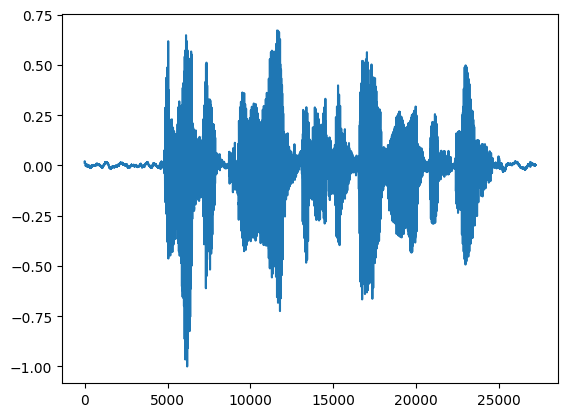

In [30]:
plt.plot(waveform.tolist()[0])

In [40]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    print('num_channels: ', num_channels)
    print('num_frames: ', num_frames)
    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show(block=False)

num_channels:  1
num_frames:  27200


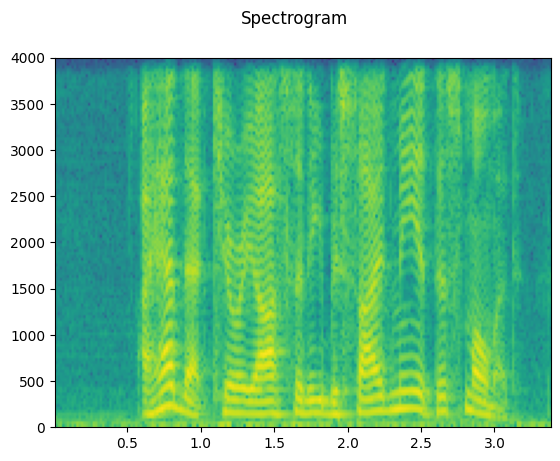

In [41]:
plot_specgram(waveform, sample_rate)


In [33]:
Audio(waveform.numpy()[0], rate=sample_rate)